In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
#Check for missing values
print('Check Missing Values:')
df.isnull().sum()

Check Missing Values:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
print('Check Unique Values:')
for col in df:
    print('Unique Values of ' + col)
    print(df[col].unique())

Check Unique Values:
Unique Values of CustomerID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
Unique Values of Gender
['Male' 'Female']
Unique Values of Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 4

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Descriptive Analytics

In [9]:
plt.style.use('fivethirtyeight')

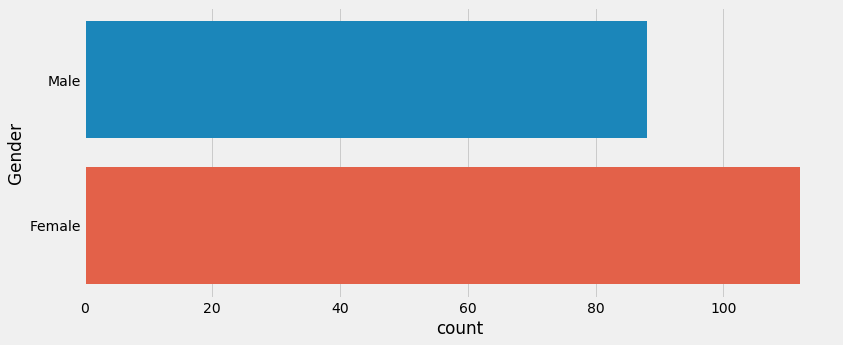

In [10]:
#Categorical features
plt.figure(1, figsize=(12,5))
sns.countplot(y='Gender', data =df)
plt.show()

1 Age
2 Annual Income (k$)
3 Spending Score (1-100)


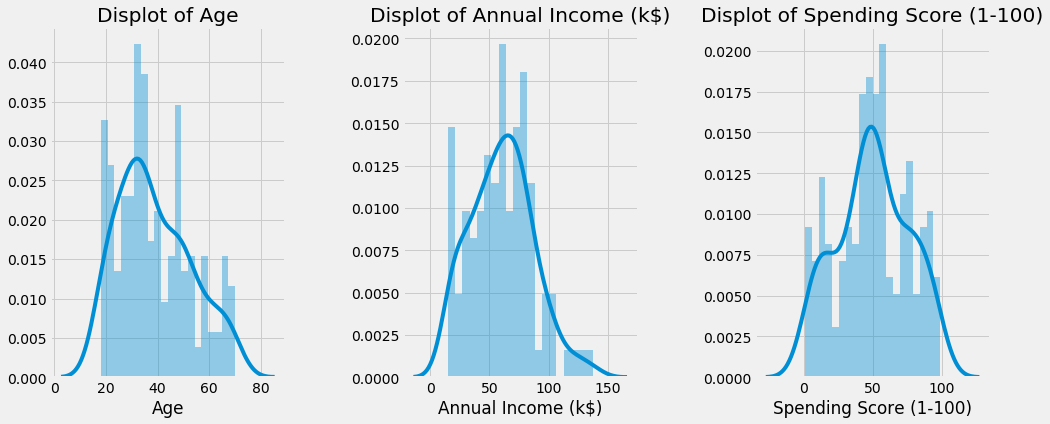

In [11]:
#Numerical features
plt.figure(1, figsize=(15,6))
n=1
for n, x in enumerate (['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    n += 1
    print(n,x)
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Displot of {}'.format(x))
plt.show()

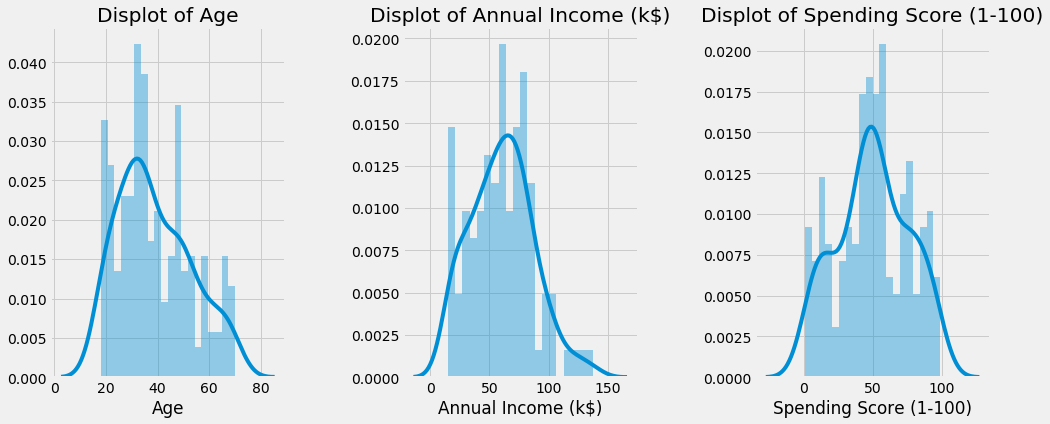

In [12]:
#Numerical features
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Displot of {}'.format(x))
plt.show()

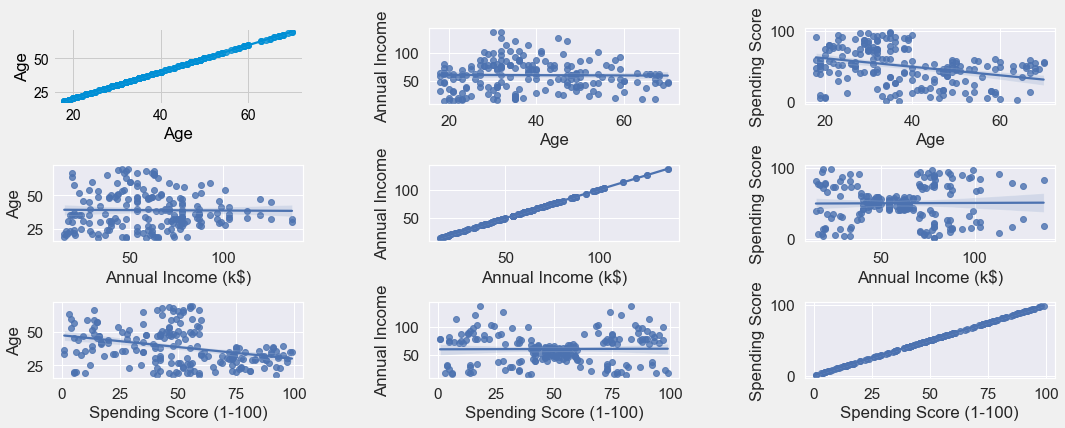

In [13]:
#Check relationship between numerical variables
plt.figure(1, figsize=(16,6))
n=0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.8, wspace =0.5)
        sns.set(font_scale=1.4)
        sns.regplot(x = x, y = y, data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
           
plt.show()

### Age vs. Annual Income w.r.t Gender

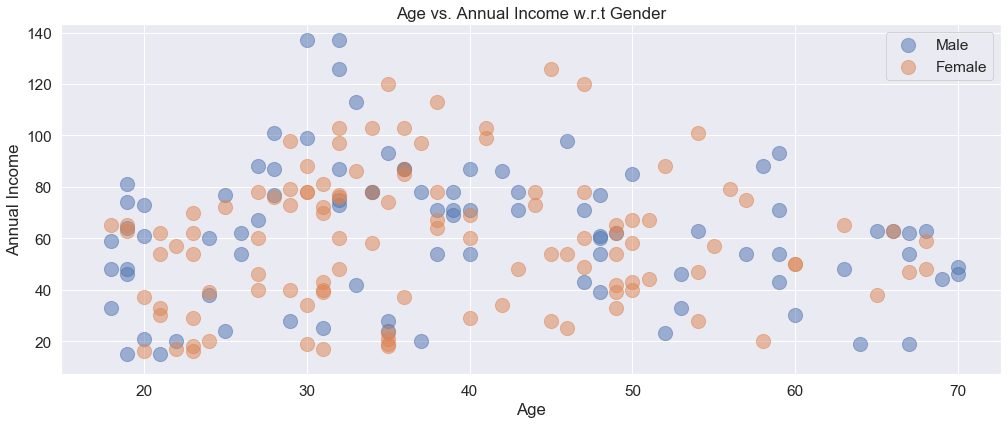

In [14]:
plt.figure(figsize =(15,6))

for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y = 'Annual Income (k$)', data=df[df['Gender']==gender], alpha = 0.5, label=gender, s=200)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs. Annual Income w.r.t Gender')
plt.legend()
plt.show()

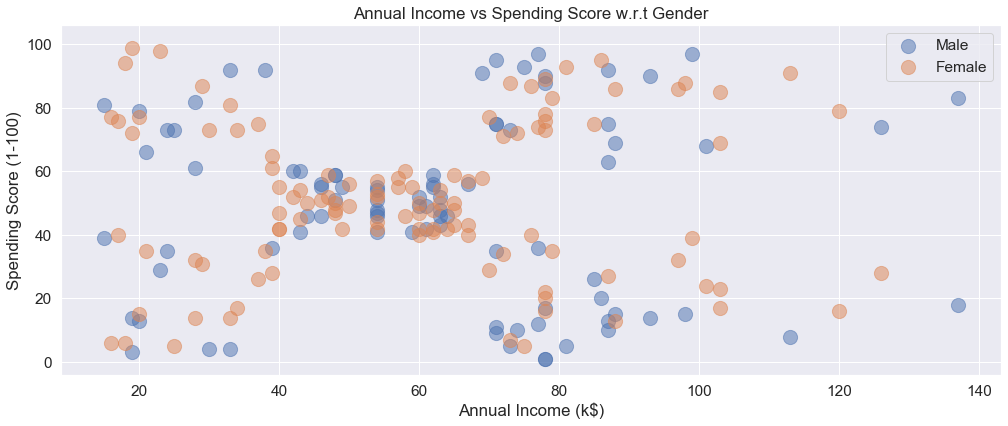

In [15]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

# Predictive Analytics - Unsupervised Machine Learning/K-Means Clustering

### Segmentation using Age and Spending Score

In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
x1 = df[['Age', 'Spending Score (1-100)']].values
inertia = []
for n in range (1,11):
    kmeans = (KMeans(n_clusters = n, init='k-means++', n_init =10, max_iter = 300,
             tol = 0.0001, random_state = 999, algorithm = 'elkan'))
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)

In [18]:
kmeans.inertia_

10162.645635521885

### Elbow method

In [19]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

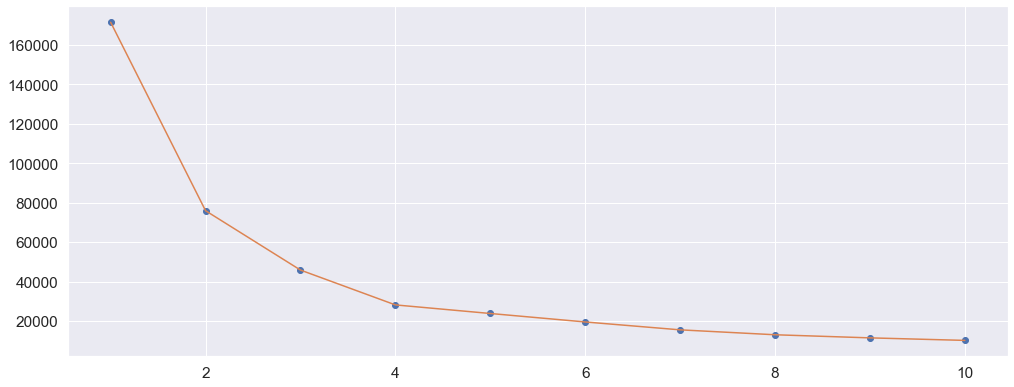

In [20]:
plt.figure(figsize = (15 , 6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 1)
plt.show()

In [21]:
kmeans = (KMeans(n_clusters = 4, init='k-means++', n_init =10, max_iter = 300,
             tol = 0.0001, random_state = 999, algorithm = 'elkan'))
kmeans.fit(x1)


KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=999, tol=0.0001, verbose=0)

In [22]:
labels1 = kmeans.labels_
centroids1 =kmeans.cluster_centers_